# Parallel Sets

## Cluster 12

In [3]:
import pandas as pd
import plotly.graph_objects as go

# --- Step 1: Load the Dataset ---
file_path = 'Clustered_LA_Crime_Data.csv'  # Replace with your actual file path
cl_df = pd.read_csv(file_path)

# Choose data points only in cluster 12
cl_df = cl_df[cl_df['Cluster'] == 12]

# Updated columns list without duplicate 'TIME OCC'
columns = [
    'AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Cluster',
    'Premis Desc', 'Status Desc', 'TIME OCC', 'Month', 'Year',
    'Crm Cd Desc', 'Weapon Desc'
]
plot_data = cl_df[columns].dropna()  # Drop rows with missing values

# --- Step 2: Select Dimensions for Sankey ---
# Selecting a subset for clarity
sankey_dimensions = ['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']

# Aggregate data
sankey_data = plot_data.groupby(sankey_dimensions).size().reset_index(name='count')

# --- Step 3: Map Categories to Unique IDs with Column Names ---
# Prefix labels with column names for clarity
sankey_data['AREA NAME'] = 'Area: ' + sankey_data['AREA NAME']
sankey_data['Crm Cd Desc'] = 'Crime: ' + sankey_data['Crm Cd Desc']
sankey_data['Weapon Desc'] = 'Weapon: ' + sankey_data['Weapon Desc']

# Create a combined list of unique labels
label_list = list(pd.unique(sankey_data[['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']].values.ravel('K')))
label_to_id = {label: idx for idx, label in enumerate(label_list)}

# Map source and target with updated labels
sankey_data['source'] = sankey_data['AREA NAME'].map(label_to_id)
sankey_data['target'] = sankey_data['Crm Cd Desc'].map(label_to_id)

# To add Weapon as the next step, create additional links
sankey_weapon = plot_data.groupby(['Crm Cd Desc', 'Weapon Desc']).size().reset_index(name='count')

# Prefix labels in sankey_weapon
sankey_weapon['Crm Cd Desc'] = 'Crime: ' + sankey_weapon['Crm Cd Desc']
sankey_weapon['Weapon Desc'] = 'Weapon: ' + sankey_weapon['Weapon Desc']

sankey_weapon['source'] = sankey_weapon['Crm Cd Desc'].map(label_to_id)
sankey_weapon['target'] = sankey_weapon['Weapon Desc'].map(label_to_id)

# Combine all links
all_links = pd.concat([
    sankey_data[['source', 'target', 'count']],
    sankey_weapon[['source', 'target', 'count']]
])

# --- Step 4: Create the Sankey Diagram ---
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color="blue"
    ),
    link=dict(
        source=all_links['source'],
        target=all_links['target'],
        value=all_links['count']
    ))])

fig.update_layout(title_text="Sankey Diagram for Cluster 12 Crime Data", font_size=10)
fig.show()

# --- Step 5: Save the Plot ---
fig.write_html('sankey_plot_12.html')

In [5]:
import pandas as pd
import plotly.graph_objects as go

# --- Step 1: Load the Dataset ---
file_path = 'Clustered_LA_Crime_Data.csv'  # Replace with your actual file path
cl_df = pd.read_csv(file_path)

# Choose data points only in cluster 15
cl_df = cl_df[cl_df['Cluster'] == 15]

# Updated columns list without duplicate 'TIME OCC'
columns = [
    'AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Cluster',
    'Premis Desc', 'Status Desc', 'TIME OCC', 'Month', 'Year',
    'Crm Cd Desc', 'Weapon Desc'
]
plot_data = cl_df[columns].dropna()  # Drop rows with missing values

# --- Step 2: Select Dimensions for Sankey ---
# Selecting a subset for clarity
sankey_dimensions = ['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']

# Aggregate data
sankey_data = plot_data.groupby(sankey_dimensions).size().reset_index(name='count')

# --- Step 3: Map Categories to Unique IDs with Column Names ---
# Prefix labels with column names for clarity
sankey_data['AREA NAME'] = 'Area: ' + sankey_data['AREA NAME']
sankey_data['Crm Cd Desc'] = 'Crime: ' + sankey_data['Crm Cd Desc']
sankey_data['Weapon Desc'] = 'Weapon: ' + sankey_data['Weapon Desc']

# Create a combined list of unique labels
label_list = list(pd.unique(sankey_data[['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']].values.ravel('K')))
label_to_id = {label: idx for idx, label in enumerate(label_list)}

# Map source and target with updated labels
sankey_data['source'] = sankey_data['AREA NAME'].map(label_to_id)
sankey_data['target'] = sankey_data['Crm Cd Desc'].map(label_to_id)

# To add Weapon as the next step, create additional links
sankey_weapon = plot_data.groupby(['Crm Cd Desc', 'Weapon Desc']).size().reset_index(name='count')

# Prefix labels in sankey_weapon
sankey_weapon['Crm Cd Desc'] = 'Crime: ' + sankey_weapon['Crm Cd Desc']
sankey_weapon['Weapon Desc'] = 'Weapon: ' + sankey_weapon['Weapon Desc']

sankey_weapon['source'] = sankey_weapon['Crm Cd Desc'].map(label_to_id)
sankey_weapon['target'] = sankey_weapon['Weapon Desc'].map(label_to_id)

# Combine all links
all_links = pd.concat([
    sankey_data[['source', 'target', 'count']],
    sankey_weapon[['source', 'target', 'count']]
])

# --- Step 4: Create the Sankey Diagram ---
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color="blue"
    ),
    link=dict(
        source=all_links['source'],
        target=all_links['target'],
        value=all_links['count']
    ))])

fig.update_layout(title_text="Sankey Diagram for Cluster 15 Crime Data", font_size=10)
fig.show()

# --- Step 5: Save the Plot ---
fig.write_html('sankey_plot_15.html')

In [6]:
import pandas as pd
import plotly.graph_objects as go

# --- Step 1: Load the Dataset ---
file_path = 'Clustered_LA_Crime_Data.csv'  # Replace with your actual file path
cl_df = pd.read_csv(file_path)

# Choose data points only in cluster 18
cl_df = cl_df[cl_df['Cluster'] == 18]

# Updated columns list without duplicate 'TIME OCC'
columns = [
    'AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Cluster',
    'Premis Desc', 'Status Desc', 'TIME OCC', 'Month', 'Year',
    'Crm Cd Desc', 'Weapon Desc'
]
plot_data = cl_df[columns].dropna()  # Drop rows with missing values

# --- Step 2: Select Dimensions for Sankey ---
# Selecting a subset for clarity
sankey_dimensions = ['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']

# Aggregate data
sankey_data = plot_data.groupby(sankey_dimensions).size().reset_index(name='count')

# --- Step 3: Map Categories to Unique IDs with Column Names ---
# Prefix labels with column names for clarity
sankey_data['AREA NAME'] = 'Area: ' + sankey_data['AREA NAME']
sankey_data['Crm Cd Desc'] = 'Crime: ' + sankey_data['Crm Cd Desc']
sankey_data['Weapon Desc'] = 'Weapon: ' + sankey_data['Weapon Desc']

# Create a combined list of unique labels
label_list = list(pd.unique(sankey_data[['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']].values.ravel('K')))
label_to_id = {label: idx for idx, label in enumerate(label_list)}

# Map source and target with updated labels
sankey_data['source'] = sankey_data['AREA NAME'].map(label_to_id)
sankey_data['target'] = sankey_data['Crm Cd Desc'].map(label_to_id)

# To add Weapon as the next step, create additional links
sankey_weapon = plot_data.groupby(['Crm Cd Desc', 'Weapon Desc']).size().reset_index(name='count')

# Prefix labels in sankey_weapon
sankey_weapon['Crm Cd Desc'] = 'Crime: ' + sankey_weapon['Crm Cd Desc']
sankey_weapon['Weapon Desc'] = 'Weapon: ' + sankey_weapon['Weapon Desc']

sankey_weapon['source'] = sankey_weapon['Crm Cd Desc'].map(label_to_id)
sankey_weapon['target'] = sankey_weapon['Weapon Desc'].map(label_to_id)

# Combine all links
all_links = pd.concat([
    sankey_data[['source', 'target', 'count']],
    sankey_weapon[['source', 'target', 'count']]
])

# --- Step 4: Create the Sankey Diagram ---
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color="blue"
    ),
    link=dict(
        source=all_links['source'],
        target=all_links['target'],
        value=all_links['count']
    ))])

fig.update_layout(title_text="Sankey Diagram for Cluster 18 Crime Data", font_size=10)
fig.show()

# --- Step 5: Save the Plot ---
fig.write_html('sankey_plot_18.html')

# Upset Plots

## Cluster 12

In [7]:
!pip install upsetplot

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24861 sha256=5a132ef25dd382615856840057a45f425339cd731db2f69f49be73fc4faa9147
  Stored in directory: c:\users\priya\appdata\local\pip\cache\wheels\7b\ce\88\1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\plottin

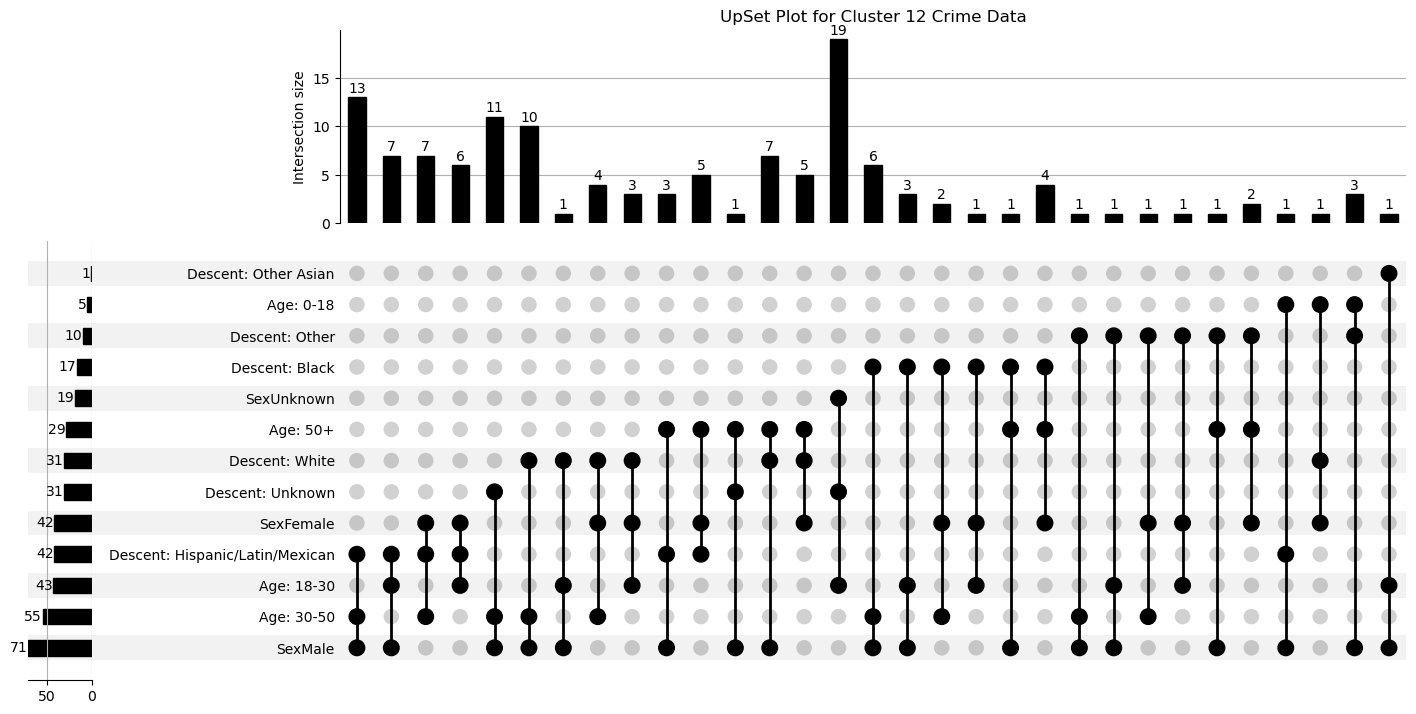

<Figure size 640x480 with 0 Axes>

In [12]:
# Step 0: Install upsetplot (if not already installed)
# You can run the following command in your terminal or uncomment the next line in Jupyter Notebook
# !pip install upsetplot

import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

# --- Step 1: Load the Dataset ---
file_path = 'Clustered_LA_Crime_Data.csv'  # Replace with your actual file path
cl_df = pd.read_csv(file_path)

# --- Step 2: Filter Data for Cluster 12 ---
cl_df = cl_df[cl_df['Cluster'] == 12]

# --- Step 3: Select Relevant Columns and Drop Missing Values ---
columns = ['Vict Age', 'Vict Sex', 'Vict Descent']
plot_data = cl_df[columns].dropna()

# --- Step 4: Prepare Data for UpSet Plot ---
# Prefix labels with column names for clarity
# plot_data['AREA NAME'] = 'Area: ' + plot_data['AREA NAME']
# plot_data['Crm Cd Desc'] = 'Crime: ' + plot_data['Crm Cd Desc']
# plot_data['Weapon Desc'] = 'Weapon: ' + plot_data['Weapon Desc']
plot_data['Vict Age'] = 'Age: ' + plot_data['Vict Age'].astype(str)
plot_data['Vict Sex'] = 'Sex' + plot_data['Vict Sex']
plot_data['Vict Descent'] = 'Descent: ' + plot_data['Vict Descent']

# Convert each row to a list of memberships
memberships = plot_data.apply(lambda row: list(row), axis=1).tolist()

# Create the UpSet data structure using from_memberships
upset_data = from_memberships(memberships)

# --- Step 5: Create the UpSet Plot ---
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("UpSet Plot for Cluster 12 Crime Data")
plt.show()

# --- Step 6: Save the Plot ---
plt.savefig('upset_plot_12.png')

## Cluster 15

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\plottin

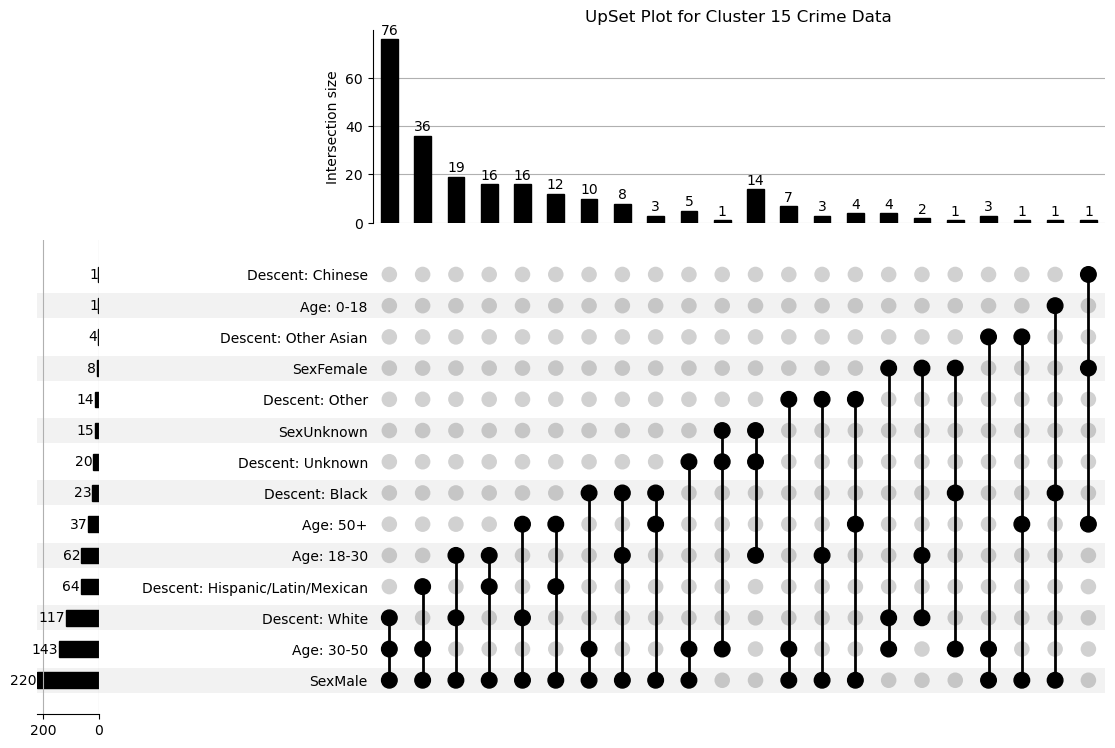

<Figure size 640x480 with 0 Axes>

In [13]:
# Step 0: Install upsetplot (if not already installed)
# You can run the following command in your terminal or uncomment the next line in Jupyter Notebook
# !pip install upsetplot

import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

# --- Step 1: Load the Dataset ---
file_path = 'Clustered_LA_Crime_Data.csv'  # Replace with your actual file path
cl_df = pd.read_csv(file_path)

# --- Step 2: Filter Data for Cluster 15 ---
cl_df = cl_df[cl_df['Cluster'] == 15]

# --- Step 3: Select Relevant Columns and Drop Missing Values ---
columns = ['Vict Age', 'Vict Sex', 'Vict Descent']
plot_data = cl_df[columns].dropna()

# --- Step 4: Prepare Data for UpSet Plot ---
# Prefix labels with column names for clarity
# plot_data['AREA NAME'] = 'Area: ' + plot_data['AREA NAME']
# plot_data['Crm Cd Desc'] = 'Crime: ' + plot_data['Crm Cd Desc']
# plot_data['Weapon Desc'] = 'Weapon: ' + plot_data['Weapon Desc']
plot_data['Vict Age'] = 'Age: ' + plot_data['Vict Age'].astype(str)
plot_data['Vict Sex'] = 'Sex' + plot_data['Vict Sex']
plot_data['Vict Descent'] = 'Descent: ' + plot_data['Vict Descent']

# Convert each row to a list of memberships
memberships = plot_data.apply(lambda row: list(row), axis=1).tolist()

# Create the UpSet data structure using from_memberships
upset_data = from_memberships(memberships)

# --- Step 5: Create the UpSet Plot ---
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("UpSet Plot for Cluster 15 Crime Data")
plt.show()

# --- Step 6: Save the Plot ---
plt.savefig('upset_plot_15.png')

## Cluster 18

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\upsetplot\plottin

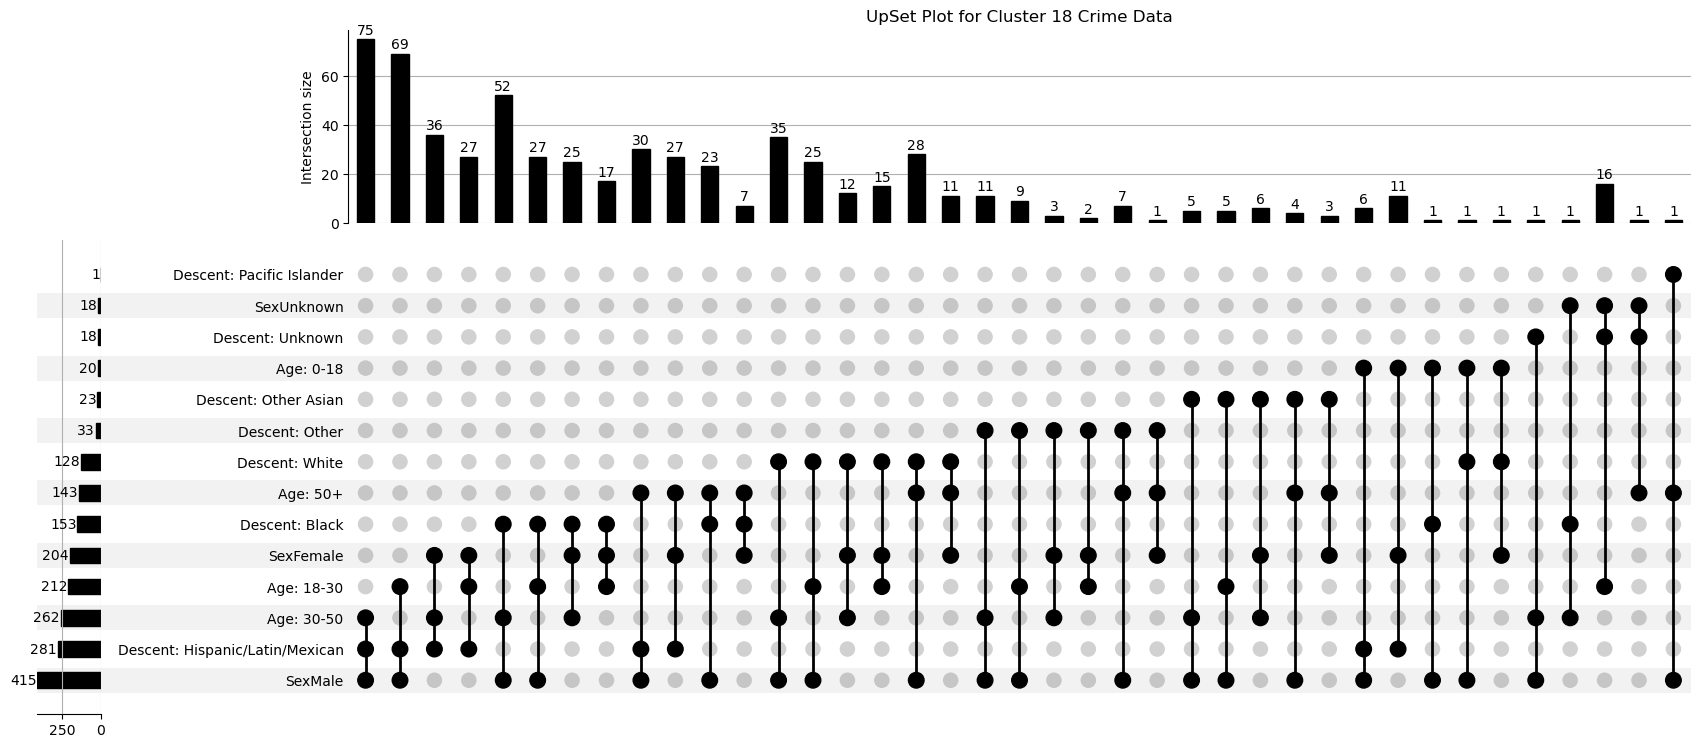

<Figure size 640x480 with 0 Axes>

In [14]:
# Step 0: Install upsetplot (if not already installed)
# You can run the following command in your terminal or uncomment the next line in Jupyter Notebook
# !pip install upsetplot

import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

# --- Step 1: Load the Dataset ---
file_path = 'Clustered_LA_Crime_Data.csv'  # Replace with your actual file path
cl_df = pd.read_csv(file_path)

# --- Step 2: Filter Data for Cluster 18 ---
cl_df = cl_df[cl_df['Cluster'] == 18]

# --- Step 3: Select Relevant Columns and Drop Missing Values ---
columns = ['Vict Age', 'Vict Sex', 'Vict Descent']
plot_data = cl_df[columns].dropna()

# --- Step 4: Prepare Data for UpSet Plot ---
# Prefix labels with column names for clarity
# plot_data['AREA NAME'] = 'Area: ' + plot_data['AREA NAME']
# plot_data['Crm Cd Desc'] = 'Crime: ' + plot_data['Crm Cd Desc']
# plot_data['Weapon Desc'] = 'Weapon: ' + plot_data['Weapon Desc']
plot_data['Vict Age'] = 'Age: ' + plot_data['Vict Age'].astype(str)
plot_data['Vict Sex'] = 'Sex' + plot_data['Vict Sex']
plot_data['Vict Descent'] = 'Descent: ' + plot_data['Vict Descent']

# Convert each row to a list of memberships
memberships = plot_data.apply(lambda row: list(row), axis=1).tolist()

# Create the UpSet data structure using from_memberships
upset_data = from_memberships(memberships)

# --- Step 5: Create the UpSet Plot ---
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("UpSet Plot for Cluster 18 Crime Data")
plt.show()

# --- Step 6: Save the Plot ---
plt.savefig('upset_plot_18.png')